In [22]:
# Created by: Michael Cullen
# 08/10/2024

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import ipywidgets as widgets

In [24]:
df = pd.read_csv('Average-prices-2024-06.csv', header=0)  # Header=0 to use the first row as column names

print(df.head())  # Display the first few rows to verify
print(df.columns)  # Display column names

         Date       Region_Name  Area_Code  Average_Price  Monthly_Change  \
0  1968-04-01  Northern Ireland  N92000001    3661.485500             0.0   
1  1968-04-01           England  E92000001    3408.108064             0.0   
2  1968-04-01             Wales  W92000004    2885.414162             0.0   
3  1968-04-01          Scotland  S92000003    2844.980688             0.0   
4  1968-04-01            London  E12000007    4418.489911             0.0   

   Annual_Change  Average_Price_SA  
0            NaN               NaN  
1            NaN               NaN  
2            NaN               NaN  
3            NaN               NaN  
4            NaN               NaN  
Index(['Date', 'Region_Name', 'Area_Code', 'Average_Price', 'Monthly_Change',
       'Annual_Change', 'Average_Price_SA'],
      dtype='object')


In [48]:
area_set = {i for i in df['Region_Name']}
    

dropdown = widgets.Dropdown(
    options=sorted(area_set),
    description='Area:',
    disabled=False,
)

# Filter by the region/area of interest
area_of_interest = dropdown.value
df_area = df[df['Region_Name'] == area_of_interest]

display(dropdown)


Dropdown(description='Area:', options=('Aberdeenshire', 'Adur', 'Amber Valley', 'Angus', 'Antrim and Newtownab…

C:\Users\mjcul\AppData\Local\Temp\ipykernel_15028\3806226261.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_area['Date'] = pd.to_datetime(df_area['Date'])
C:\Users\mjcul\AppData\Local\Temp\ipykernel_15028\3806226261.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_area['Years'] = pd.DatetimeIndex(df_area['Date']).year
C:\Users\mjcul\AppData\Local\Temp\ipykernel_15028\3806226261.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an under

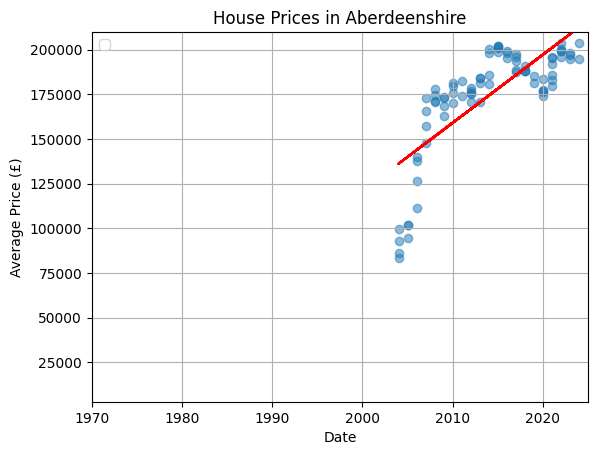

In [49]:
if df_area.empty:
    print(f"No data found for region: {area_of_interest}")
else:
    # Convert 'Date' column to datetime format
    df_area['Date'] = pd.to_datetime(df_area['Date'])

    # Use every 5th sample from the dataset
    df_area['Years'] = pd.DatetimeIndex(df_area['Date']).year

    # Prepare features and target variable
    df_area_sampled = df_area.iloc[::2]

    # Prepare features (X) and target variable (y)
    x = df_area_sampled[['Years']]
    y = df_area_sampled['Average_Price']

    #split data
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

    # Train the model
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)

    # Plot the data
    plt.xlabel('Date')
    plt.ylabel('Average Price (£)')
    plt.title(f'House Prices in {area_of_interest}')
    plt.legend()
    plt.scatter(X_train,y_train,alpha=0.5)
    plt.xlim(1970)
    plt.ylim(3000)
    plt.grid(True)
    plt.plot(X_train,y_pred,color='red')


In [27]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     9977.30342081444
Model intercept: -19736796.692778405
